# scran processing in python

This notebook demonstrates the process of normalizing single-cell RNA sequencing (scRNA-seq) data using the `scranpy` library in Python. The steps include:

1. **Importing necessary packages**: Various libraries such as `numpy`, `scanpy`, `seaborn`, and `scranpy` are imported for data manipulation, visualization, and normalization.
2. **Loading the data**: The scRNA-seq data is loaded from an H5AD file.
3. **Filtering the data**: The dataset is filtered to include only specific samples based on metadata.
4. **Saving raw counts**: The raw counts of the filtered dataset are saved for future reference.
5. **Running scran normalization**: The `scranpy` library is used to compute size factors and normalize the data.
6. **Adding normalized data back**: The normalized data is added back to the dataset.
7. **Visualizing the results**: Histograms are plotted to visualize the distribution of size factors and normalized counts.
8. **Saving the processed data**: The final normalized dataset is saved to an HDF5 file.

This notebook provides a comprehensive workflow for preprocessing and normalizing scRNA-seq data, which is crucial for downstream analysis.

In [1]:
# import packages
import json 
import scanpy as sc
import seaborn as sns
from matplotlib import pyplot as plt
from collections import OrderedDict
import scipy 
import pandas as pd
import pickle
import singlecellexperiment
import scranpy

In [3]:
data_path = '/home/jupyter/data/ra_longitudinal/scrna/'

# load data

In [5]:
# load the deep clean data
joint_adata_fl = sc.read_h5ad(
    '/home/jupyter/data/ra_longitudinal/scrna/certPro/ALTRA_certPro_scRNA_141_samples_combined_adata.h5ad'
)

/home/jupyter/libs/scranpy/lib/python3.9/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [6]:
joint_adata_fl

AnnData object with n_obs × n_vars = 2059581 × 33538
    obs: 'barcodes', 'batch_id', 'cell_name', 'cell_uuid', 'chip_id', 'hto_barcode', 'hto_category', 'n_genes', 'n_mito_umis', 'n_reads', 'n_umis', 'original_barcodes', 'pbmc_sample_id', 'pool_id', 'well_id', 'sample.sampleKitGuid', 'cohort.cohortGuid', 'subject.subjectGuid', 'subject.biologicalSex', 'subject.race', 'subject.ethnicity', 'subject.birthYear', 'sample.visitName', 'sample.drawDate', 'sample.diseaseStatesRecordedAtVisit', 'sample.daysSinceFirstVisit', 'file.id', 'subset_grp', 'predicted_doublet', 'doublet_score', 'AIFI_L1', 'AIFI_L1_score', 'AIFI_L2', 'AIFI_L2_score', 'AIFI_L3', 'AIFI_L3_score', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'leiden_harmony_2', 'doublets_manual', 'AIFI_L3_new', 'S

In [7]:
# filter out the cross-sectional analysis
crox_meta = pd.read_csv('/home/jupyter/data/ra_longitudinal/output_results/integration/mofa/crox/ALTRA_MOFA_intergration_cross-sectinoal_metadata.csv')

In [9]:
# filter the dataset 
crox_adata = joint_adata_fl[joint_adata_fl.obs['sample.sampleKitGuid'].isin(crox_meta['sample'])].copy()

In [10]:
del joint_adata_fl

In [11]:
# save the raw counts
crox_adata.layers['counts'] = crox_adata.X.copy()
crox_adata

AnnData object with n_obs × n_vars = 1290371 × 33538
    obs: 'barcodes', 'batch_id', 'cell_name', 'cell_uuid', 'chip_id', 'hto_barcode', 'hto_category', 'n_genes', 'n_mito_umis', 'n_reads', 'n_umis', 'original_barcodes', 'pbmc_sample_id', 'pool_id', 'well_id', 'sample.sampleKitGuid', 'cohort.cohortGuid', 'subject.subjectGuid', 'subject.biologicalSex', 'subject.race', 'subject.ethnicity', 'subject.birthYear', 'sample.visitName', 'sample.drawDate', 'sample.diseaseStatesRecordedAtVisit', 'sample.daysSinceFirstVisit', 'file.id', 'subset_grp', 'predicted_doublet', 'doublet_score', 'AIFI_L1', 'AIFI_L1_score', 'AIFI_L2', 'AIFI_L2_score', 'AIFI_L3', 'AIFI_L3_score', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'leiden_harmony_2', 'doublets_manual', 'AIFI_L3_new', 'S

In [12]:
# save the dataset
crox_adata.write_h5ad(data_path+'ALTRA_AIM1_2_crox_scRNA_filtered_cell.h5ad')

# run scran processing

In [4]:
# load data
crox_sce = singlecellexperiment.read_h5ad(
    data_path + 'ALTRA_AIM1_2_crox_scRNA_filtered_cell.h5ad')

/home/jupyter/libs/scranpy/lib/python3.9/site-packages/genomicranges/SeqInfo.py:348: UserWarning: 'seqnames' is deprecated, use 'get_seqnames' instead
  warn("'seqnames' is deprecated, use 'get_seqnames' instead", UserWarning)


In [7]:
options = scranpy.AnalyzeOptions()

In [8]:
# run normalization compute the size factor
size_factors = scranpy.normalization.grouped_size_factors(crox_sce, 
    options=scranpy.normalization.GroupedSizeFactorsOptions(groups=crox_sce.column_data['AIFI_L2'],
                                      initial_factors=None, assay_type='counts', num_threads=62))

In [9]:
size_factors

array([1.12665477, 1.16689826, 0.99826663, ..., 1.07033266, 1.07796142,
       1.39641777])

<Axes: ylabel='Count'>

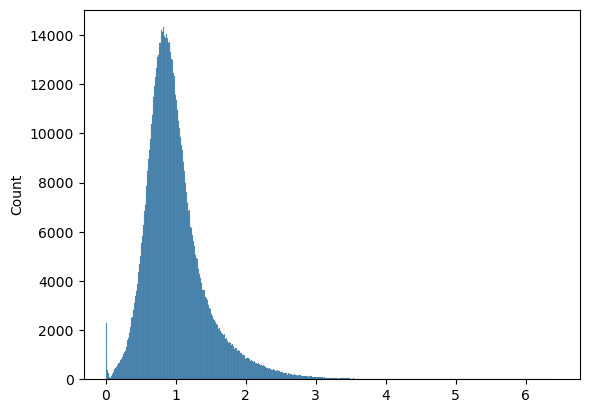

In [25]:
sns.histplot(size_factors) 

### add the normalized data back 

In [11]:
# # load the dataset
crox_adata = sc.read_h5ad(data_path+'ALTRA_AIM1_2_crox_scRNA_filtered_cell.h5ad')

In [12]:
crox_adata

AnnData object with n_obs × n_vars = 1290371 × 33538
    obs: 'barcodes', 'batch_id', 'cell_name', 'cell_uuid', 'chip_id', 'hto_barcode', 'hto_category', 'n_genes', 'n_mito_umis', 'n_reads', 'n_umis', 'original_barcodes', 'pbmc_sample_id', 'pool_id', 'well_id', 'sample.sampleKitGuid', 'cohort.cohortGuid', 'subject.subjectGuid', 'subject.biologicalSex', 'subject.race', 'subject.ethnicity', 'subject.birthYear', 'sample.visitName', 'sample.drawDate', 'sample.diseaseStatesRecordedAtVisit', 'sample.daysSinceFirstVisit', 'file.id', 'subset_grp', 'predicted_doublet', 'doublet_score', 'AIFI_L1', 'AIFI_L1_score', 'AIFI_L2', 'AIFI_L2_score', 'AIFI_L3', 'AIFI_L3_score', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'leiden_harmony_2', 'doublets_manual', 'AIFI_L3_new', 'S

In [13]:
from scipy.sparse import csr_matrix, issparse

In [15]:
# add normalizated data
crox_adata.obs["size_factors"] = size_factors
scran = crox_adata.layers["counts"] / crox_adata.obs["size_factors"].values[:, None]
crox_adata.layers["scran_normalization"] = csr_matrix(sc.pp.log1p(scran))

In [35]:
# crox_adata.obs["size_factors"].values[:, None]

<Axes: ylabel='Count'>

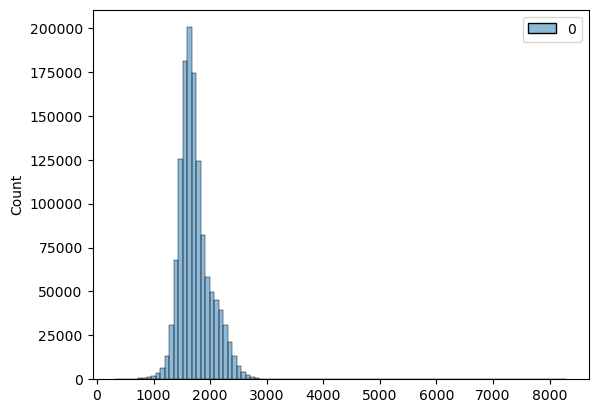

In [31]:
sns.histplot(crox_adata.layers["scran_normalization"].sum(1), bins=100, kde=False)

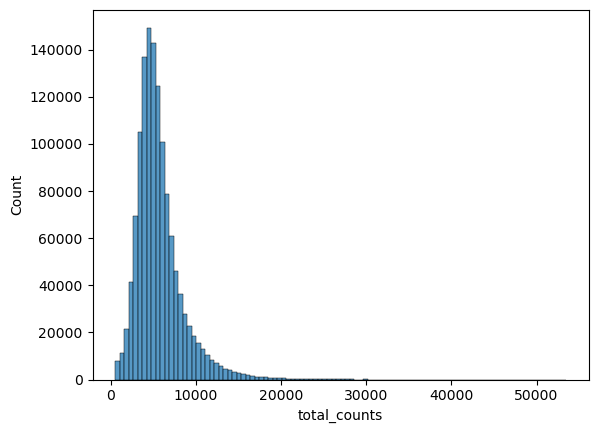

In [18]:
p1 = sns.histplot(crox_adata.obs["total_counts"], bins=100, kde=False)

<Axes: ylabel='Count'>

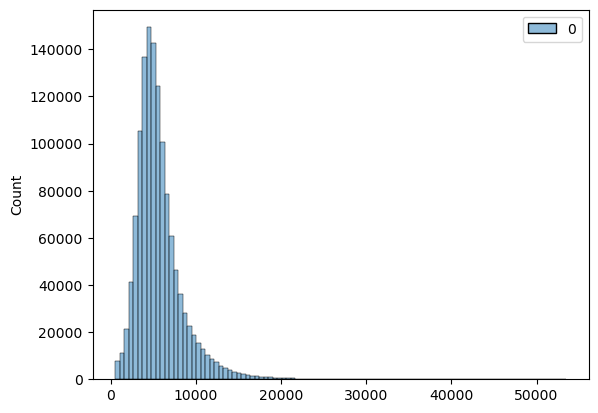

In [19]:
sns.histplot(crox_adata.layers["counts"].sum(1), bins=100, kde=False)

In [36]:
crox_adata.layers["scran_normalization"]

<1290371x33538 sparse matrix of type '<class 'numpy.float64'>'
	with 2218927686 stored elements in Compressed Sparse Row format>

In [37]:
# save the dataset
crox_adata.write_h5ad(data_path+'ALTRA_AIM1_2_crox_scRNA_filtered_cell.h5ad')

In [38]:
crox_adata

AnnData object with n_obs × n_vars = 1290371 × 33538
    obs: 'barcodes', 'batch_id', 'cell_name', 'cell_uuid', 'chip_id', 'hto_barcode', 'hto_category', 'n_genes', 'n_mito_umis', 'n_reads', 'n_umis', 'original_barcodes', 'pbmc_sample_id', 'pool_id', 'well_id', 'sample.sampleKitGuid', 'cohort.cohortGuid', 'subject.subjectGuid', 'subject.biologicalSex', 'subject.race', 'subject.ethnicity', 'subject.birthYear', 'sample.visitName', 'sample.drawDate', 'sample.diseaseStatesRecordedAtVisit', 'sample.daysSinceFirstVisit', 'file.id', 'subset_grp', 'predicted_doublet', 'doublet_score', 'AIFI_L1', 'AIFI_L1_score', 'AIFI_L2', 'AIFI_L2_score', 'AIFI_L3', 'AIFI_L3_score', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'leiden_harmony_2', 'doublets_manual', 'AIFI_L3_new', 'S